<a href="https://colab.research.google.com/github/KavyaChoudhary2008/project117/blob/main/project117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd

df = pd.read_csv("curtosis.csv")

print(df.head(10))

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661  -2.80730 -0.44699      0
1   4.54590    8.1674  -2.45860 -1.46210      0
2   3.86600   -2.6383   1.92420  0.10645      0
3   3.45660    9.5228  -4.01120 -3.59440      0
4   0.32924   -4.4552   4.57180 -0.98880      0
5   4.36840    9.6718  -3.96060 -3.16250      0
6   3.59120    3.0129   0.72888  0.56421      0
7   2.09220   -6.8100   8.46360 -0.60216      0
8   3.20320    5.7588  -0.75345 -0.61251      0
9   1.53560    9.1772  -2.27180 -0.73535      0


In [17]:
from sklearn.model_selection import train_test_split 
factors = df[["variance", "skewness", "curtosis", "entropy"]]
class_list = df["class"]

factors_train, factors_test, class_list_train, class_list_test = train_test_split(factors, class_list, test_size = 0.25, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

factors_train = sc_x.fit_transform(factors_train)  
factors_test = sc_x.transform(factors_test)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state = 0) 
classifier2.fit(factors_train, class_list_train)

LogisticRegression(random_state=0)

In [20]:
class_list_prediction_1 = classifier2.predict(factors_test)

predicted_values_1 = []
for i in class_list_prediction_1:
  if i == 0:
    predicted_values_1.append("No")
  else:
    predicted_values_1.append("Yes")

actual_values_1 = []
for i in class_list_test.ravel():
  if i == 0:
    actual_values_1.append("No")
  else:
    actual_values_1.append("Yes")

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

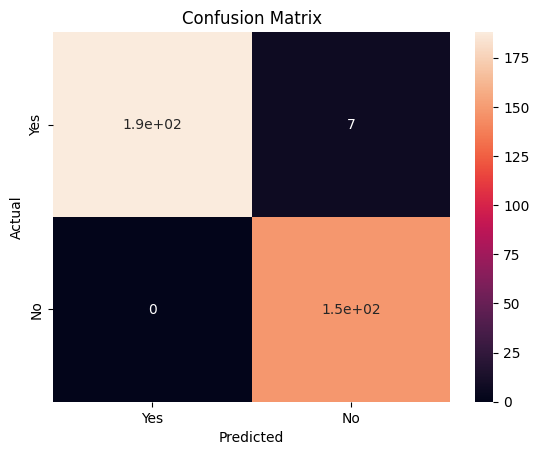

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  
labels = ["Yes", "No"]
cm = confusion_matrix(actual_values_1, predicted_values_1)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)

In [25]:
#extracting true_positives, false_positives, true_negatives, false_negatives 
tn, fp, fn, tp = confusion_matrix(class_list_test, class_list_prediction_1).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp) 
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  188
False Positives:  7
False Negatives:  0
True Positives:  148


In [28]:
#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn)
print("Accuracy: ",(Accuracy))

Accuracy:  97.95918367346938
